In [1]:
import pandas as pd
pd.options.display.max_columns = 999

In [2]:
# data loading
df_price = pd.read_csv("time-series-fifa-master/data/player_price.csv")
df_stats = pd.read_csv("time-series-fifa-master/data/player_stats.csv")

In [3]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

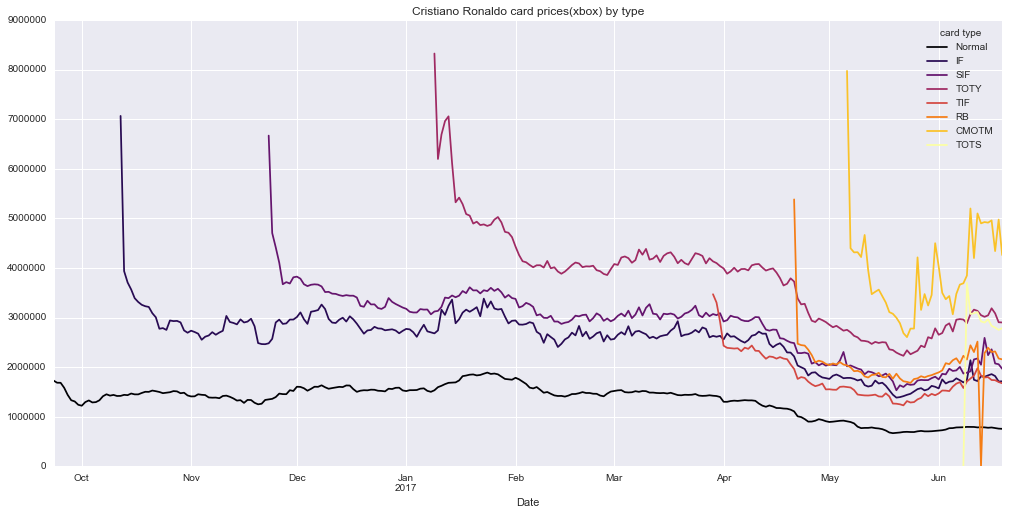

In [6]:
# filter only Cristiano Ronaldo
df_stats_CR = df_stats[(df_stats["name"]=="Cristiano Ronaldo")]

# merge player's stats with player's prices
cr_m = df_stats_CR[["player_id",'revision']].merge(df_price, on=['player_id'], how='inner')

# convert timestamp to datetime
cr_m['Date'] = pd.to_datetime(cr_m['timestamp'], unit='ms')
cr_m.drop(["timestamp"], axis=1, inplace=True)

cr_price_types=cr_m.rename(columns={'revision': 'card type'}).pivot(index='Date', columns='card type', values='xbox_price')
cr_price_types=cr_price_types[['Normal', 'IF','SIF','TOTY','TIF','RB','CMOTM','TOTS']]
cr_price_types.plot(figsize=(17,8), title='Cristiano Ronaldo card prices(xbox) by type', colormap='inferno')
